<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [167]:
# Code:
def get_mean(data):
    return sum([x for x in data])/len(data)
test_data=[5,5,5,5]
get_mean(test_data)

5.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [168]:
# Code:
def get_std(data):
    data_mean=get_mean(data)
   
    return get_mean(([(x-data_mean)**2 for x in data]))**.5

test_data=[1,5,5,1]
get_std(test_data)

2.0

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [169]:
# Code:
def convert_km(x):
    x=str(x)
    if x[-1] == 'k':
        x=x[:-1]
        return int(float(x)*1000)
    if x[-1] == 'M':
        x=x[:-1]
        return int(float(x)*1_000_000)
    if x[-1] == 'B':
        x=x[:-1]
        return int(float(x)*1_000_000_000)
    else:
        return int(x)
    


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [235]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objective: 
We will be exploring the growing wealth inequality of the US and its impact on life expectancy over time. To measure wealth inequality we will be using the Gini Index as it is the most universally available statistic, which will make it ideal for comparison with other countries. So when you see reference to the Gini Index know that is is measuring wealth inequality with lower values meaning greater wealth EQUALITY and higher values meaning greater wealth INEQUALITY. values over 40 using the Gini Index are considered to be indicative of great wealth INEQUALITY, so 40 will be an important value that we will be looking at. 

We will look at countries with similar population sizes and GNI for comparison and will also look at most countries in our data set as a whole, to look for trends and indicators of correlation between life expectancy and wealth inequality. 

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [373]:
gnidf=pd.read_csv('./data/gni_per_cap_atlas_method_con2021.csv')
ledf=pd.read_csv('./data/life_expectancy.csv')
popdf=pd.read_csv('./data/population.csv')
ginidf=pd.read_csv('./data/gini.csv')

1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.


In [374]:
gnidf.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [375]:
ledf.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [376]:
popdf.head(), popdf.shape

(                country   1800   1801   1802   1803   1804   1805   1806  \
 0           Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
 1                Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
 2               Albania   400k   402k   404k   405k   407k   409k   411k   
 3               Andorra   2650   2650   2650   2650   2650   2650   2650   
 4  United Arab Emirates  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   
 
     1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
 0  3.28M  3.28M  ...   108M   108M   109M   109M   109M   110M   110M   110M   
 1  1.57M  1.57M  ...   125M   126M   127M   128M   129M   130M   131M   131M   
 2   413k   414k  ...  1.35M  1.32M  1.29M  1.26M  1.23M  1.21M  1.18M  1.15M   
 3   2650   2650  ...  62.5k  62.2k  61.9k  61.7k  61.4k  61.2k  60.9k  60.7k   
 4  40.2k  40.2k  ...  13.5M  13.5M  13.6M  13.7M  13.8M  13.8M  13.9M    14M   
 
     2099   2100  
 0   111M   111M  
 1   132M 

In [377]:
# we want to change the index to country, for now anyway, it will make cleaning easier
popdf.set_index('country', inplace=True)
ledf.set_index('country', inplace=True)
gnidf.set_index('country', inplace=True)
ginidf.set_index('country', inplace=True)

In [378]:
#we got a bunch of extra stuff we dont need, we will stop at 2019 because of the unreliability and complex variables relatd to the pandemic impacting our data
popdf=popdf.loc[:, '1950':'2024']
ledf=ledf.loc[:, '1950':'2024']
gnidf=gnidf.loc[:, '1950':'2024']
ginidf=ginidf.loc[:, '1950':'2024']


In [379]:
gnidf.head()#lets take a peek at one of our dfs now just to check

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,409,414,420,438,440,440,452,443,459,462,...,655,611,578,531,530,500,508,519,531,539
Angola,1440,1480,1510,1550,1480,1580,1520,1640,1700,1680,...,5020,4190,3760,3340,3030,2140,2090,2070,2080,2100
Albania,508,530,531,553,568,599,606,644,673,701,...,4880,4800,4680,5060,5330,5210,5480,5710,5950,6160
United Arab Emirates,18.6k,20.2k,20.9k,22.3k,24.1k,23.9k,24.7k,24.6k,24.7k,26k,...,47.6k,45.1k,42.8k,43.2k,44.7k,39.4k,39.4k,39.2k,39.1k,38.9k
Argentina,4250,4320,4020,4160,4250,4470,4510,4660,4860,4470,...,14k,13.6k,14.3k,12.9k,11.5k,9070,9500,9640,9750,9810


2. Check for missing values.


In [380]:
popdf.shape

(197, 75)

In [381]:
popdf[popdf.isnull().any(axis=1)]
# we can see that for population we have only one bad row, and its not one we care about so we can drop it


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country,,,,,,,,,,,,,,,,,,,,,
Holy See,899,892,887,890,897,904,909,911,910,908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [382]:
popdf.dropna(axis=0, inplace=True)

In [383]:
popdf.shape, popdf[popdf.isnull().any(axis=1)] #we see that its now gone, and our data only lost one row from the shape


((196, 75),
 Empty DataFrame
 Columns: [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
 Index: []
 
 [0 rows x 75 columns])

In [247]:
popdf.shape # we lost only that one weird row

(196, 75)

In [248]:
#we must now do the same for the other two data sets
ledf.shape, ledf[ledf.isnull().any(axis=1)]

((195, 75),
                      1950  1951  1952  1953  1954  1955  1956  1957  1958  \
 country                                                                     
 Andorra              74.6  74.7  74.8  75.0  75.1  75.2  75.3  75.4  75.5   
 Dominica             49.3  50.6  51.7  53.0  54.1  55.1  56.1  57.2  58.2   
 St. Kitts and Nevis  60.8  61.9  62.4  62.7  62.7  62.2  61.5  60.1  58.7   
 Monaco               68.2  68.1  68.3  68.7  69.0  69.3  69.7  70.0  70.4   
 Marshall Islands     52.1  52.6  53.0  53.4  53.9  54.3  54.7  55.1  55.6   
 Nauru                58.5  58.7  59.0  59.2  59.4  59.6  59.9  60.1  60.3   
 Palau                49.0  49.5  49.9  50.4  50.9  51.4  51.9  52.4  52.9   
 San Marino           72.0  72.1  72.2  72.3  72.4  72.5  72.5  72.6  72.7   
 Tuvalu               47.0  47.3  47.8  48.2  48.7  49.1  49.6  50.0  50.5   
 
                      1959  ...  2015  2016  2017  2018  2019  2020  2021  \
 country                    ...                    

In [249]:
#again these are very small countries that wont be part of our investigation, so we can drop them as well
ledf.dropna(axis=0, inplace=True)

In [250]:
ledf.shape, ledf.head()

((186, 75),
                       1950  1951  1952  1953  1954  1955  1956  1957  1958  \
 country                                                                      
 Afghanistan           42.7  42.9  43.1  43.5  43.3  43.9  44.1  44.3  44.5   
 Angola                45.6  45.6  45.6  45.6  45.6  45.5  45.7  45.8  45.9   
 Albania               52.2  53.6  54.5  55.4  56.1  56.3  58.0  59.3  61.0   
 United Arab Emirates  58.4  58.5  58.6  58.7  58.8  58.9  58.8  59.3  59.6   
 Argentina             63.3  63.5  64.2  64.1  64.7  64.5  65.2  65.2  65.4   
 
                       1959  ...  2015  2016  2017  2018  2019  2020  2021  \
 country                     ...                                             
 Afghanistan           44.7  ...  61.9  62.0  62.9  62.7  63.3  63.4  64.0   
 Angola                46.1  ...  63.5  63.9  64.2  64.6  65.1  65.2  65.8   
 Albania               61.7  ...  78.1  78.2  78.3  78.4  78.5  77.9  78.7   
 United Arab Emirates  59.7  ...  73.2  73.

In [251]:
gnidf.shape, gnidf[gnidf.isnull().any(axis=1)]

((191, 75),
               1950 1951 1952 1953 1954 1955 1956 1957 1958 1959  ... 2015  \
 country                                                          ...        
 Liechtenstein  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
 
               2016 2017 2018 2019 2020 2021 2022 2023 2024  
 country                                                     
 Liechtenstein  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
 
 [1 rows x 75 columns])

In [252]:
# we have one country with no data, lets drop this bad boy
gnidf.dropna(axis=0, inplace=True)
gnidf.shape, gnidf.head()

((190, 75),
                        1950   1951   1952   1953   1954   1955   1956   1957  \
 country                                                                        
 Afghanistan             409    414    420    438    440    440    452    443   
 Angola                 1440   1480   1510   1550   1480   1580   1520   1640   
 Albania                 508    530    531    553    568    599    606    644   
 United Arab Emirates  18.6k  20.2k  20.9k  22.3k  24.1k  23.9k  24.7k  24.6k   
 Argentina              4250   4320   4020   4160   4250   4470   4510   4660   
 
                        1958  1959  ...   2015   2016   2017   2018   2019  \
 country                            ...                                      
 Afghanistan             459   462  ...    655    611    578    531    530   
 Angola                 1700  1680  ...   5020   4190   3760   3340   3030   
 Albania                 673   701  ...   4880   4800   4680   5060   5330   
 United Arab Emirates  24.7k 

In [253]:
ginidf.shape, ginidf[ginidf.isnull().any(axis=1)]

((195, 75),
 Empty DataFrame
 Columns: [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
 Index: []
 
 [0 rows x 75 columns])

3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).


In [254]:
# before we can do this we want to convert are values to floats and/or ints so we can work with as we want
# we saw pop and gni had strings in their values so lets run our function to clean them
for column in popdf.columns:
    popdf[column]=popdf[column].apply(lambda x : convert_km(x))
    
for column in gnidf.columns:
    gnidf[column]=gnidf[column].apply(lambda x : convert_km(x))

In [255]:
#see how we did
popdf.info(), gnidf.info() # we have all floats thats good

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, Afghanistan to Zimbabwe
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1950    196 non-null    int64
 1   1951    196 non-null    int64
 2   1952    196 non-null    int64
 3   1953    196 non-null    int64
 4   1954    196 non-null    int64
 5   1955    196 non-null    int64
 6   1956    196 non-null    int64
 7   1957    196 non-null    int64
 8   1958    196 non-null    int64
 9   1959    196 non-null    int64
 10  1960    196 non-null    int64
 11  1961    196 non-null    int64
 12  1962    196 non-null    int64
 13  1963    196 non-null    int64
 14  1964    196 non-null    int64
 15  1965    196 non-null    int64
 16  1966    196 non-null    int64
 17  1967    196 non-null    int64
 18  1968    196 non-null    int64
 19  1969    196 non-null    int64
 20  1970    196 non-null    int64
 21  1971    196 non-null    int64
 22  1972    196 non-null    int64
 23  1973 

(None, None)

In [256]:
#below cells collapsed for space and organizations

In [257]:
popdf.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7480000,7570000,7670000,7760000,7860000,7970000,8090000,8210000,8330000,8470000,...,33800000,34600000,35600000,36700000,37800000,39000000,40100000,41100000,42200000,43400000
Angola,4480000,4570000,4660000,4760000,4850000,4940000,5020000,5100000,5190000,5270000,...,28100000,29200000,30200000,31300000,32400000,33400000,34500000,35600000,36700000,37800000
Albania,1250000,1290000,1330000,1370000,1410000,1450000,1500000,1550000,1600000,1660000,...,2880000,2880000,2880000,2880000,2870000,2870000,2850000,2840000,2830000,2830000
Andorra,6010,5830,5450,5310,5570,6120,6710,7330,7990,8700,...,71700,72500,73800,75000,76300,77700,79000,79800,80100,80300
United Arab Emirates,74600,79800,85100,90600,96100,102000,108000,113000,120000,126000,...,8920000,8990000,9070000,9140000,9210000,9290000,9370000,9440000,9520000,9590000


In [258]:
gnidf.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,409,414,420,438,440,440,452,443,459,462,...,655,611,578,531,530,500,508,519,531,539
Angola,1440,1480,1510,1550,1480,1580,1520,1640,1700,1680,...,5020,4190,3760,3340,3030,2140,2090,2070,2080,2100
Albania,508,530,531,553,568,599,606,644,673,701,...,4880,4800,4680,5060,5330,5210,5480,5710,5950,6160
United Arab Emirates,18600,20200,20900,22300,24100,23900,24700,24600,24700,26000,...,47600,45100,42800,43200,44700,39400,39400,39200,39100,38900
Argentina,4250,4320,4020,4160,4250,4470,4510,4660,4860,4470,...,14000,13600,14300,12900,11500,9070,9500,9640,9750,9810


In [259]:
ledf.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,52.123656,52.297312,52.995699,53.589785,54.145699,54.481183,54.913441,55.244086,55.812366,56.163441,...,71.866667,72.125806,72.400000,72.640860,72.871505,72.446237,73.270968,73.462903,73.645161,73.831183
std,10.323465,10.469644,10.536361,10.504854,10.515446,10.467129,10.473064,10.443619,10.576307,10.433685,...,7.670637,7.520572,7.358723,7.187222,7.014872,6.753106,6.898329,6.854162,6.818734,6.778551
min,30.600000,26.500000,29.500000,32.600000,33.200000,33.400000,33.800000,33.000000,31.000000,35.700000,...,48.500000,49.600000,50.400000,51.400000,51.800000,52.000000,52.600000,53.000000,53.300000,53.700000
25%,43.650000,44.000000,44.350000,44.650000,45.100000,45.575000,45.775000,45.825000,46.075000,46.725000,...,65.700000,66.000000,66.925000,66.800000,67.400000,67.425000,67.900000,68.025000,68.250000,68.525000
50%,51.900000,52.450000,53.000000,53.350000,53.650000,54.650000,55.100000,55.550000,56.150000,56.750000,...,73.250000,73.300000,73.600000,73.650000,73.850000,73.200000,74.150000,74.300000,74.400000,74.600000
75%,59.675000,60.150000,60.750000,61.700000,62.600000,62.900000,63.475000,63.775000,64.750000,64.825000,...,77.325000,77.450000,77.700000,77.825000,77.950000,77.000000,78.275000,78.450000,78.575000,78.700000
max,73.000000,72.200000,72.600000,72.900000,73.100000,73.200000,73.300000,73.300000,73.300000,73.500000,...,84.300000,84.500000,84.700000,84.800000,84.800000,84.900000,85.100000,85.300000,85.400000,85.500000


In [260]:
#our data is clean all our entries are int type and we are looking only at years of interest, now lets take a look and trends across all

In [261]:
#We want to find countries whose population size and gni are similar to the US in 1980 and 2019 as this is the area of greatest concern
#in order to answer our questions on the changes of US life expectancy over time
gnidf.sort_values(by='2019', ascending=False)[:10],gnidf.sort_values(by='1980', ascending=False)['1980'][:10]


(                1950   1951   1952   1953   1954   1955   1956   1957   1958  \
 country                                                                        
 Switzerland    34900  37300  37100  37900  39600  41800  44000  45100  43500   
 Norway         10500  11000  11300  11600  12100  12200  12800  13000  12900   
 Luxembourg     11900  11000  11700  11800  11800  12300  12800  13300  13500   
 Iceland         6680   6350   6930   6980   7420   7930   8110   7920   8300   
 United States  18800  19900  20300  20900  20400  21500  21500  21500  21000   
 Denmark        13200  13200  13300  13900  14100  14100  14200  15200  15400   
 Ireland         5250   5390   5540   5700   5770   5960   5930   5950   5890   
 Qatar            823    995   1250   1570   1980   2480   3120   3920   4930   
 Singapore       2150   2030   1410   1680   1930   1770   1950   1730   1730   
 Sweden         16100  16600  16700  17100  17700  18100  18600  19400  19300   
 
                 1959  ...

In [262]:
# we see the us in 2019 is about 67,200 so lets grab a list of countries whos gni is over 50,000 for 2019
#andover 32000 for 1980
gross_list2019=gnidf[gnidf['2019']>50000].index.tolist()
gross_list1980=gnidf[gnidf['1980']>32000].index.tolist()

In [263]:
gross_list2019, gross_list1980

(['Australia',
  'Austria',
  'Switzerland',
  'Germany',
  'Denmark',
  'Finland',
  'Hong Kong, China',
  'Ireland',
  'Iceland',
  'Luxembourg',
  'Netherlands',
  'Norway',
  'Qatar',
  'Singapore',
  'Sweden',
  'United States'],
 ['United Arab Emirates',
  'Brunei',
  'Switzerland',
  'Denmark',
  'Japan',
  'Kuwait',
  'Norway',
  'Nauru',
  'Qatar',
  'Sweden',
  'United States'])

In [264]:
#next we want to do something similar for our population grabbing countries of simliar population size to US for 1980 and 2019
popdf.sort_values(by='2019', ascending=False)[:10], #get only over 100000000
popdf.sort_values(by='1980', ascending=False)['1980'][:10] #get over 7500000


country
China            982000000
India            697000000
United States    223000000
Indonesia        148000000
Russia           138000000
Brazil           122000000
Japan            118000000
Bangladesh        83900000
Pakistan          80600000
Germany           77800000
Name: 1980, dtype: int64

In [265]:
pop_list2019=popdf[popdf['2019']>100000000].index.tolist()
pop_list1980=popdf[popdf['1980']>75000000].index.tolist()

In [266]:
#we will also be looking at the gini index for countries who have healthy and dangerous Gini Index 
#40 is believed to be a very critical and dangerous threshold to cross, so we will split countries by those above and those below 40
gini_good=ginidf[ginidf['2019']<40].index.tolist()
gini_bad=ginidf[ginidf['2019']>=40].index.tolist()

In [267]:
#We will want to take a look at countries who have life expectancies over 80 and those under 75, 
#to see if we see any trends with regard to wealth inequality
good_ledf=ledf[ledf['2019']>=80].index.tolist()
bad_ledf=ledf[(ledf['2019']<75)&((ledf['2019']>65))].index.tolist()

In [268]:
good_ledf, bad_ledf

(['Australia',
  'Austria',
  'Belgium',
  'Canada',
  'Switzerland',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Cyprus',
  'Germany',
  'Denmark',
  'Spain',
  'Finland',
  'France',
  'United Kingdom',
  'Greece',
  'Hong Kong, China',
  'Ireland',
  'Iceland',
  'Israel',
  'Italy',
  'Japan',
  'South Korea',
  'Kuwait',
  'Luxembourg',
  'Malta',
  'Netherlands',
  'Norway',
  'New Zealand',
  'Panama',
  'Peru',
  'Portugal',
  'Singapore',
  'Slovenia',
  'Sweden',
  'Taiwan'],
 ['Angola',
  'United Arab Emirates',
  'Azerbaijan',
  'Bangladesh',
  'Bulgaria',
  'Bahamas',
  'Belarus',
  'Belize',
  'Bolivia',
  'Brunei',
  'Bhutan',
  'Congo, Rep.',
  'Comoros',
  'Cape Verde',
  'Djibouti',
  'Dominican Republic',
  'Egypt',
  'Ethiopia',
  'Fiji',
  'Gabon',
  'Georgia',
  'Ghana',
  'Gambia',
  'Equatorial Guinea',
  'Grenada',
  'Guatemala',
  'Guyana',
  'Honduras',
  'Indonesia',
  'India',
  'Iraq',
  'Kazakhstan',
  'Kenya',
  'Kyrgyz Republic',
  'Cambodia',
  'Lao',


In [269]:
pop_list2019, pop_list1980

(['Bangladesh',
  'Brazil',
  'China',
  'Egypt',
  'Ethiopia',
  'Indonesia',
  'India',
  'Japan',
  'Mexico',
  'Nigeria',
  'Pakistan',
  'Philippines',
  'Russia',
  'United States'],
 ['Bangladesh',
  'Brazil',
  'China',
  'Germany',
  'Indonesia',
  'India',
  'Japan',
  'Pakistan',
  'Russia',
  'United States'])

In [270]:
#lets create a set of countries to use for our data with our lists of countries of similar pop size and GNI

In [271]:
gross_countries=gross_list2019 + gross_list1980
pop_countries=pop_list2019 + pop_list1980

In [272]:
#we will create sets to prevent redundancy 
gross_countries=set(gross_countries)
pop_countries=set(pop_countries)
rowsunion=set((gross_countries) or  (pop_countries))
rowsint=set((gross_countries) &  (pop_countries))

In [273]:
rowsunion, rowsint

({'Australia',
  'Austria',
  'Brunei',
  'Denmark',
  'Finland',
  'Germany',
  'Hong Kong, China',
  'Iceland',
  'Ireland',
  'Japan',
  'Kuwait',
  'Luxembourg',
  'Nauru',
  'Netherlands',
  'Norway',
  'Qatar',
  'Singapore',
  'Sweden',
  'Switzerland',
  'United Arab Emirates',
  'United States'},
 {'Germany', 'Japan', 'United States'})

In [274]:
#looking at our list some of these countries dont belong or create issues due to lack of corresponding data in our other datasets
rowsunion.remove('Nauru') #this
rowsunion.remove('Hong Kong, China')
rowsunion

{'Australia',
 'Austria',
 'Brunei',
 'Denmark',
 'Finland',
 'Germany',
 'Iceland',
 'Ireland',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Qatar',
 'Singapore',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United States'}

In [275]:
ginidf.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,34.0,34.0,34.0,34.1,34.3,34.4,34.5,34.6,34.6,34.5,...,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8,36.8
Albania,26.6,26.6,26.6,26.6,26.6,26.6,26.6,26.6,26.6,26.6,...,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
Algeria,39.6,39.6,39.6,39.6,39.7,39.7,39.7,39.7,39.7,39.7,...,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6,27.6
Andorra,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
Angola,57.0,56.8,56.6,56.5,56.4,56.3,56.2,56.1,56.0,55.9,...,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6,42.6


In [278]:
#lets make sure we dont have any countries that are missing in our gnidf
for i in gnidf.index:
    if i in ginidf.index:
        a='a'
    else:
        print(i)


Hong Kong, China
Eswatini


In [279]:
for i in gini_bad:
    if i in ledf.index:
        a='a'
    else:
        gini_bad.remove(i)


In [280]:
#lets make our simplified data frames looking only at the Select Countries
popdf_simp=popdf.loc[list(rowsunion)]
ledf_simp=ledf.loc[list(rowsunion)]
gni_simp=gnidf.loc[list(rowsunion)]
gini_simp=ginidf.loc[list(rowsunion)]


In [284]:
#again we need to clear out countries that dont overlap acros data, some of these countries are very small islands, 
#and dont correlate well with the variables of larger countries like the US 
for i in gini_good:
    if i in ledf.index:
        a='a'
    else:
        gini_good.remove(i)


In [285]:
#creating more custom dataframes for analysis
ledf_gini_good=ledf.loc[list(gini_good)]

In [286]:
#creating more custom dataframes for analysis
ledf_gini_bad=ledf.loc[list(gini_bad)]

In [287]:
#lets check that our dataframes turned out as expected
popdf_simp

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country,,,,,,,,,,,,,,,,,,,,,
United Arab Emirates,74600,79800,85100,90600,96100,102000,108000,113000,120000,126000,...,8920000,8990000,9070000,9140000,9210000,9290000,9370000,9440000,9520000,9590000
Qatar,24300,25100,25900,26800,27700,28700,29700,30900,32200,34000,...,2410000,2600000,2710000,2770000,2810000,2760000,2690000,2700000,2720000,2740000
Australia,8180000,8420000,8630000,8820000,9000000,9210000,9430000,9640000,9850000,10100000,...,23800000,24200000,24600000,25000000,25400000,25700000,25900000,26200000,26400000,26700000
Germany,71000000,70800000,70800000,70900000,71000000,71200000,71500000,71800000,72100000,72600000,...,82100000,82300000,82600000,82900000,83100000,83300000,83400000,83400000,83300000,83300000
Brunei,48300,51100,54000,57200,60600,64300,68200,72400,76700,81000,...,421000,426000,430000,434000,438000,442000,445000,449000,453000,456000
Denmark,4270000,4300000,4330000,4360000,4390000,4430000,4460000,4490000,4520000,4550000,...,5680000,5710000,5740000,5770000,5800000,5830000,5850000,5880000,5910000,5940000
Japan,84400000,85700000,86900000,88100000,89100000,90100000,91000000,91800000,92700000,93600000,...,127000000,127000000,127000000,126000000,126000000,125000000,125000000,124000000,123000000,123000000
Luxembourg,297000,298000,300000,302000,304000,306000,307000,309000,311000,313000,...,569000,583000,596000,608000,620000,630000,639000,648000,655000,662000
Iceland,143000,145000,148000,151000,154000,158000,161000,165000,168000,172000,...,331000,336000,344000,353000,361000,367000,370000,373000,375000,378000


In [288]:
#These were the main custom dataframes used so lets import them to csv files 
#in case we want to access them in other notebooks while we work or if others want to use them
popdf_simp.to_csv('./data/popdf_simp.csv', index=False)  
gni_simp.to_csv('./data/gnidf_simp.csv', index=False)  
ledf_simp.to_csv('./data/ledf_simp.csv', index=False)
gini_simp.to_csv('./data/gini_simmp.csv', index=False) #we now have these saved for later use

In [289]:
# See README.md for Data Dictionary

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|This is an example| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [290]:
sd={}

for column in list(ledf_simp.columns):
    
    sd[column]=get_std(ledf_simp[column])

In [291]:
sd #we see a decrease in sd over time, as we would expect

{'1950': 5.431737043802783,
 '1951': 5.213502605569747,
 '1952': 5.225449125152476,
 '1953': 5.096231838070991,
 '1954': 5.0326633933758105,
 '1955': 5.027641048765858,
 '1956': 5.0933284264647405,
 '1957': 5.069128769521885,
 '1958': 4.901133341711996,
 '1959': 4.7411500878083,
 '1960': 4.482869826757913,
 '1961': 4.206550754725011,
 '1962': 4.069922103428742,
 '1963': 3.766818241910541,
 '1964': 3.614191786757884,
 '1965': 3.3896453045796293,
 '1966': 3.244727237788321,
 '1967': 3.212225607238781,
 '1968': 3.267416575879546,
 '1969': 3.1709641830861965,
 '1970': 3.1615417536998955,
 '1971': 3.0397459436048346,
 '1972': 2.99376082513556,
 '1973': 2.9534992626944794,
 '1974': 2.874474539479578,
 '1975': 2.866000910473784,
 '1976': 2.7890466405987024,
 '1977': 2.855533579238854,
 '1978': 2.789999950356934,
 '1979': 2.734736031765208,
 '1980': 2.646662038228217,
 '1981': 2.6085412656552007,
 '1982': 2.6667543845222093,
 '1983': 2.674947898630514,
 '1984': 2.5652698529165576,
 '1985': 2.5

In [292]:
means={}

for column in list(ledf_simp.columns):
    
    means[column]=round(get_mean(ledf_simp[column]),2)

In [293]:
means # here we see the mean increase over time also as expected

{'1950': 65.72,
 '1951': 66.08,
 '1952': 66.57,
 '1953': 66.9,
 '1954': 67.34,
 '1955': 67.64,
 '1956': 67.79,
 '1957': 67.98,
 '1958': 68.43,
 '1959': 68.68,
 '1960': 68.96,
 '1961': 69.26,
 '1962': 69.43,
 '1963': 69.61,
 '1964': 69.82,
 '1965': 70.06,
 '1966': 70.27,
 '1967': 70.41,
 '1968': 70.44,
 '1969': 70.62,
 '1970': 70.78,
 '1971': 71.07,
 '1972': 71.29,
 '1973': 71.5,
 '1974': 71.79,
 '1975': 72.08,
 '1976': 72.37,
 '1977': 72.65,
 '1978': 72.91,
 '1979': 73.13,
 '1980': 73.42,
 '1981': 73.68,
 '1982': 73.9,
 '1983': 74.12,
 '1984': 74.48,
 '1985': 74.6,
 '1986': 74.78,
 '1987': 74.93,
 '1988': 75.04,
 '1989': 75.19,
 '1990': 75.33,
 '1991': 75.37,
 '1992': 75.95,
 '1993': 76.09,
 '1994': 76.33,
 '1995': 76.47,
 '1996': 76.71,
 '1997': 76.86,
 '1998': 77.09,
 '1999': 77.25,
 '2000': 77.54,
 '2001': 77.87,
 '2002': 78.02,
 '2003': 78.24,
 '2004': 78.49,
 '2005': 78.73,
 '2006': 78.95,
 '2007': 79.16,
 '2008': 79.36,
 '2009': 79.57,
 '2010': 79.88,
 '2011': 80.09,
 '2012': 80.

In [294]:
#get the mean for all countries including selected
means_all={}

for column in list(ledf.columns):
    
    means_all[column]=round(get_mean(ledf[column]),2)
means_all

{'1950': 52.12,
 '1951': 52.3,
 '1952': 53.0,
 '1953': 53.59,
 '1954': 54.15,
 '1955': 54.48,
 '1956': 54.91,
 '1957': 55.24,
 '1958': 55.81,
 '1959': 56.16,
 '1960': 56.47,
 '1961': 56.96,
 '1962': 57.47,
 '1963': 57.86,
 '1964': 58.28,
 '1965': 58.61,
 '1966': 58.99,
 '1967': 59.14,
 '1968': 59.52,
 '1969': 59.78,
 '1970': 60.05,
 '1971': 60.54,
 '1972': 60.72,
 '1973': 61.15,
 '1974': 61.55,
 '1975': 61.86,
 '1976': 62.11,
 '1977': 62.69,
 '1978': 63.0,
 '1979': 63.29,
 '1980': 63.78,
 '1981': 64.01,
 '1982': 64.02,
 '1983': 64.37,
 '1984': 64.65,
 '1985': 64.95,
 '1986': 65.27,
 '1987': 65.56,
 '1988': 65.74,
 '1989': 66.01,
 '1990': 66.15,
 '1991': 66.24,
 '1992': 66.35,
 '1993': 66.33,
 '1994': 66.18,
 '1995': 66.42,
 '1996': 66.62,
 '1997': 66.73,
 '1998': 66.85,
 '1999': 67.01,
 '2000': 67.35,
 '2001': 67.63,
 '2002': 67.82,
 '2003': 68.07,
 '2004': 68.35,
 '2005': 68.71,
 '2006': 69.08,
 '2007': 69.45,
 '2008': 69.78,
 '2009': 70.14,
 '2010': 70.39,
 '2011': 70.85,
 '2012': 71

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

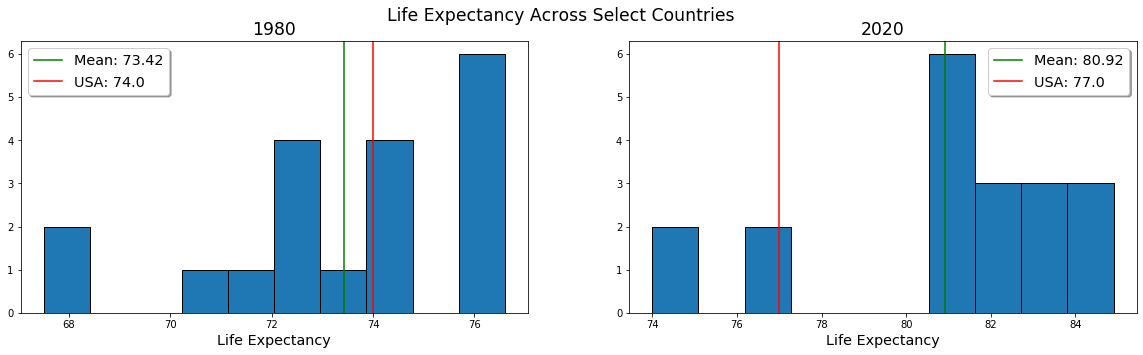

In [295]:
#lets take a look at the life expectancy across our 20 countries for 1980 and 2019
fig,ax=plt.subplots(1,2, figsize=(20,5))
ax[0].hist(ledf_simp['1980'], edgecolor='black')
ax[1].hist(ledf_simp['2020'],  edgecolor='black')
ax[0].axvline(means['1980'], color='green', label = f"Mean: {means['1980']}")
ax[1].axvline(means['2020'], color='green', label = f"Mean: {means['2020']}")
ax[0].axvline(ledf_simp['1980']['United States'], color='red', label = f"USA: {ledf_simp['1980']['United States']}")

ax[1].axvline(ledf_simp['2020']['United States'], color='red', label=f"USA: {ledf_simp['2020']['United States']}");
ax[0].set_title('1980', fontsize="xx-large")
ax[1].set_title('2020', fontsize="xx-large")
ax[0].legend(loc=0,  shadow=True, fontsize='x-large')
ax[1].legend(loc=0, shadow=True, fontsize='x-large')
ax[0].set_xlabel('Life Expectancy', fontsize="x-large")
ax[1].set_xlabel('Life Expectancy', fontsize="x-large")


fig.text(0.5, .95, 'Life Expectancy Across Select Countries', ha='center', va='center', size = 'xx-large');


we notice that in 1980 the US had a good life expectancy compared to other select countries, but in 2020 we see that the US has fallen behind most other select countries. With most other countries becoming omre concentrated in the lower to mid 80s

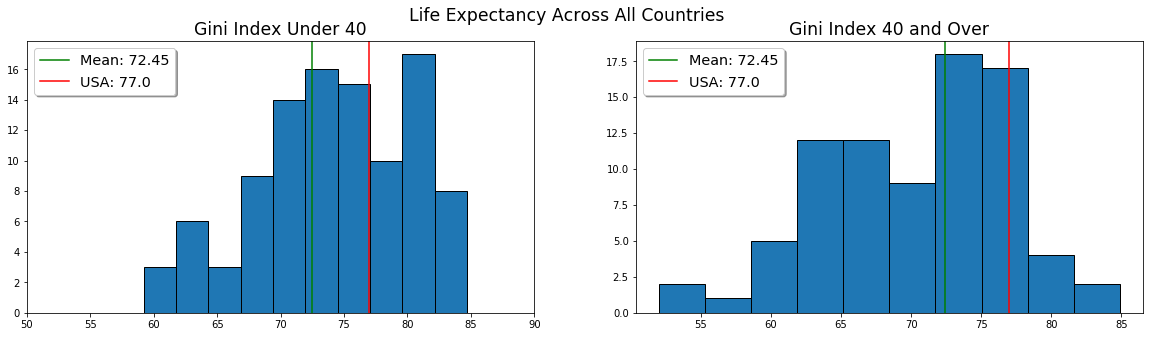

In [296]:
#lets take a look at all countries life expectancy those with Gini Index under 40 and those with Gini index over 40
fig,ax=plt.subplots(1,2, figsize=(20,5))
ax[0].hist(ledf_gini_good["2020"], edgecolor='black')
ax[1].hist(ledf_gini_bad["2020"],  edgecolor='black')
ax[0].axvline(means_all['2020'], color='green', label = f"Mean: {means_all['2020']}")
ax[1].axvline(means_all['2020'], color='green', label = f"Mean: {means_all['2020']}")
ax[0].axvline(ledf_simp['2020']['United States'], color='red', label = f"USA: {ledf_simp['2020']['United States']}")

ax[1].axvline(ledf_simp['2020']['United States'], color='red', label=f"USA: {ledf_simp['2020']['United States']}");
ax[0].set_title('Gini Index Under 40', fontsize="xx-large")
ax[1].set_title('Gini Index 40 and Over', fontsize="xx-large")
ax[0].legend(loc=0,  shadow=True, fontsize='x-large')
ax[1].legend(loc=0, shadow=True, fontsize='x-large')
ax[0].set_xlim(50,90)
fig.text(0.5, .95, 'Life Expectancy Across All Countries', ha='center', va='center', size = 'xx-large');


Here we notice that those with a lower Gini Index have life expecancy concentrated in the 70s and low 80s, with many exceeding the life expectancy of the US and the majority exceeding the mean life expectancy. Those with a Gini Index over 40 we see have a much wider range in distribution between 50-85, we might see more with a boxplot

/home/rad/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


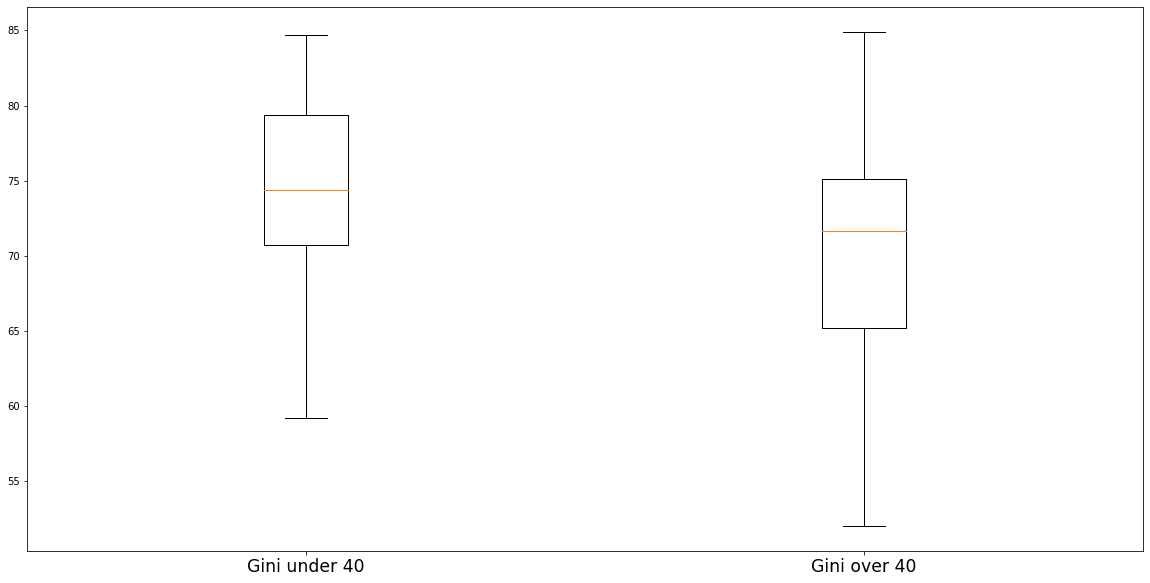

In [329]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot([ledf_gini_good["2020"], ledf_gini_bad["2020"]])
ax.set_xticklabels(["Gini under 40", "Gini over 40"], fontsize="xx-large");


Here we can see the difference better, the countries with Gini Index under 40 have a higher life expectancy on average, with 75% of the countries having a life expectancy over 70. While those with a high Gini index over 40 we see a much higher range of values with 75% of countries being at or below 75.

In [334]:
ledf_gini_good["2020"].describe(), ledf_gini_bad['2020'].describe() 
#to look at the raw numners we see those countries with lower Gini Index have better life expectancy

(count    101.000000
 mean      74.226733
 std        6.184172
 min       59.200000
 25%       70.700000
 50%       74.400000
 75%       79.400000
 max       84.700000
 Name: 2020, dtype: float64,
 count    82.000000
 mean     70.185366
 std       6.531824
 min      52.000000
 25%      65.200000
 50%      71.650000
 75%      75.100000
 max      84.900000
 Name: 2020, dtype: float64)

In [344]:
gini_good=ginidf[ginidf['2020']<40].index.tolist()
gini_bad=ginidf[ginidf['2020']>=40].index.tolist()

In [345]:
good_ledf=[]
bad_ledf=[]
for x in ledf_simp.T.columns:
    
    if x in gini_good:
        good_ledf.append(x)
    else:
        bad_ledf.append(x)

In [346]:
good_ledf

['Australia',
 'Germany',
 'Denmark',
 'Japan',
 'Luxembourg',
 'Iceland',
 'Netherlands',
 'Finland',
 'Switzerland',
 'Sweden',
 'Austria',
 'Norway',
 'Ireland']

In [347]:
bad_ledf=['Singapore',
 'Qatar',
 'Kuwait',
 'United States',
 
 'United Arab Emirates']

In [348]:
ledf_gini_bad_sub=ledf_simp.loc[list(bad_ledf)]
ledf_gini_good_sub=ledf_simp.loc[list(good_ledf)]

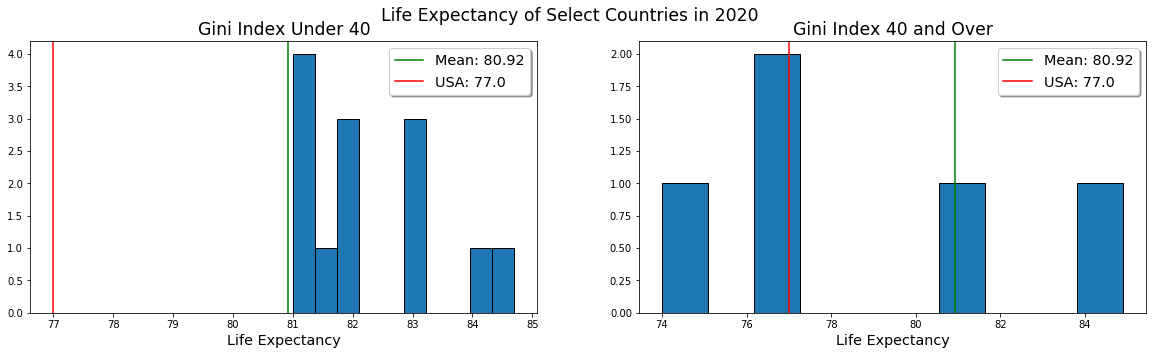

In [349]:
fig,ax=plt.subplots(1,2, figsize=(20,5))
ax[0].hist(ledf_gini_good_sub["2020"], edgecolor='black')
ax[1].hist(ledf_gini_bad_sub["2020"],  edgecolor='black')
ax[0].axvline(means['2020'], color='green', label = f"Mean: {means['2020']}")
ax[1].axvline(means['2020'], color='green', label = f"Mean: {means['2020']}")
ax[0].axvline(ledf_simp['2020']['United States'], color='red', label = f"USA: {ledf_simp['2020']['United States']}")

ax[1].axvline(ledf_simp['2020']['United States'], color='red', label=f"USA: {ledf_simp['2020']['United States']}");
ax[0].set_title('Gini Index Under 40', fontsize="xx-large")
ax[1].set_title('Gini Index 40 and Over', fontsize="xx-large")
ax[0].legend(loc=0,  shadow=True, fontsize='x-large')
ax[1].legend(loc=0, shadow=True, fontsize='x-large')
ax[0].set_xlabel('Life Expectancy', fontsize="x-large")
ax[1].set_xlabel('Life Expectancy', fontsize="x-large")
fig.text(0.5, .95, 'Life Expectancy of Select Countries in 2020', ha='center', va='center', size = 'xx-large');


Looking only at the select countries seperating by Gini Index, we see that all countries with a Gini Index under 40 have a good life expectancy over 81, while it doesnt seem to be as clear for the select countries with Gini Index over 40. So we can say that lower wealth inequality seems to be correlated wit ha higher life expectancy, but there are other variables at play for countries with higher Gini Index, this is most likely the rapid rise of Gini Index and the decrease in life expectancy is this marker slowly caching up, it is likely from this that the US will continue to see a decline in life expectancy as Gini Index increases, but lets take a look at how it has been trending over time.

No handles with labels found to put in legend.


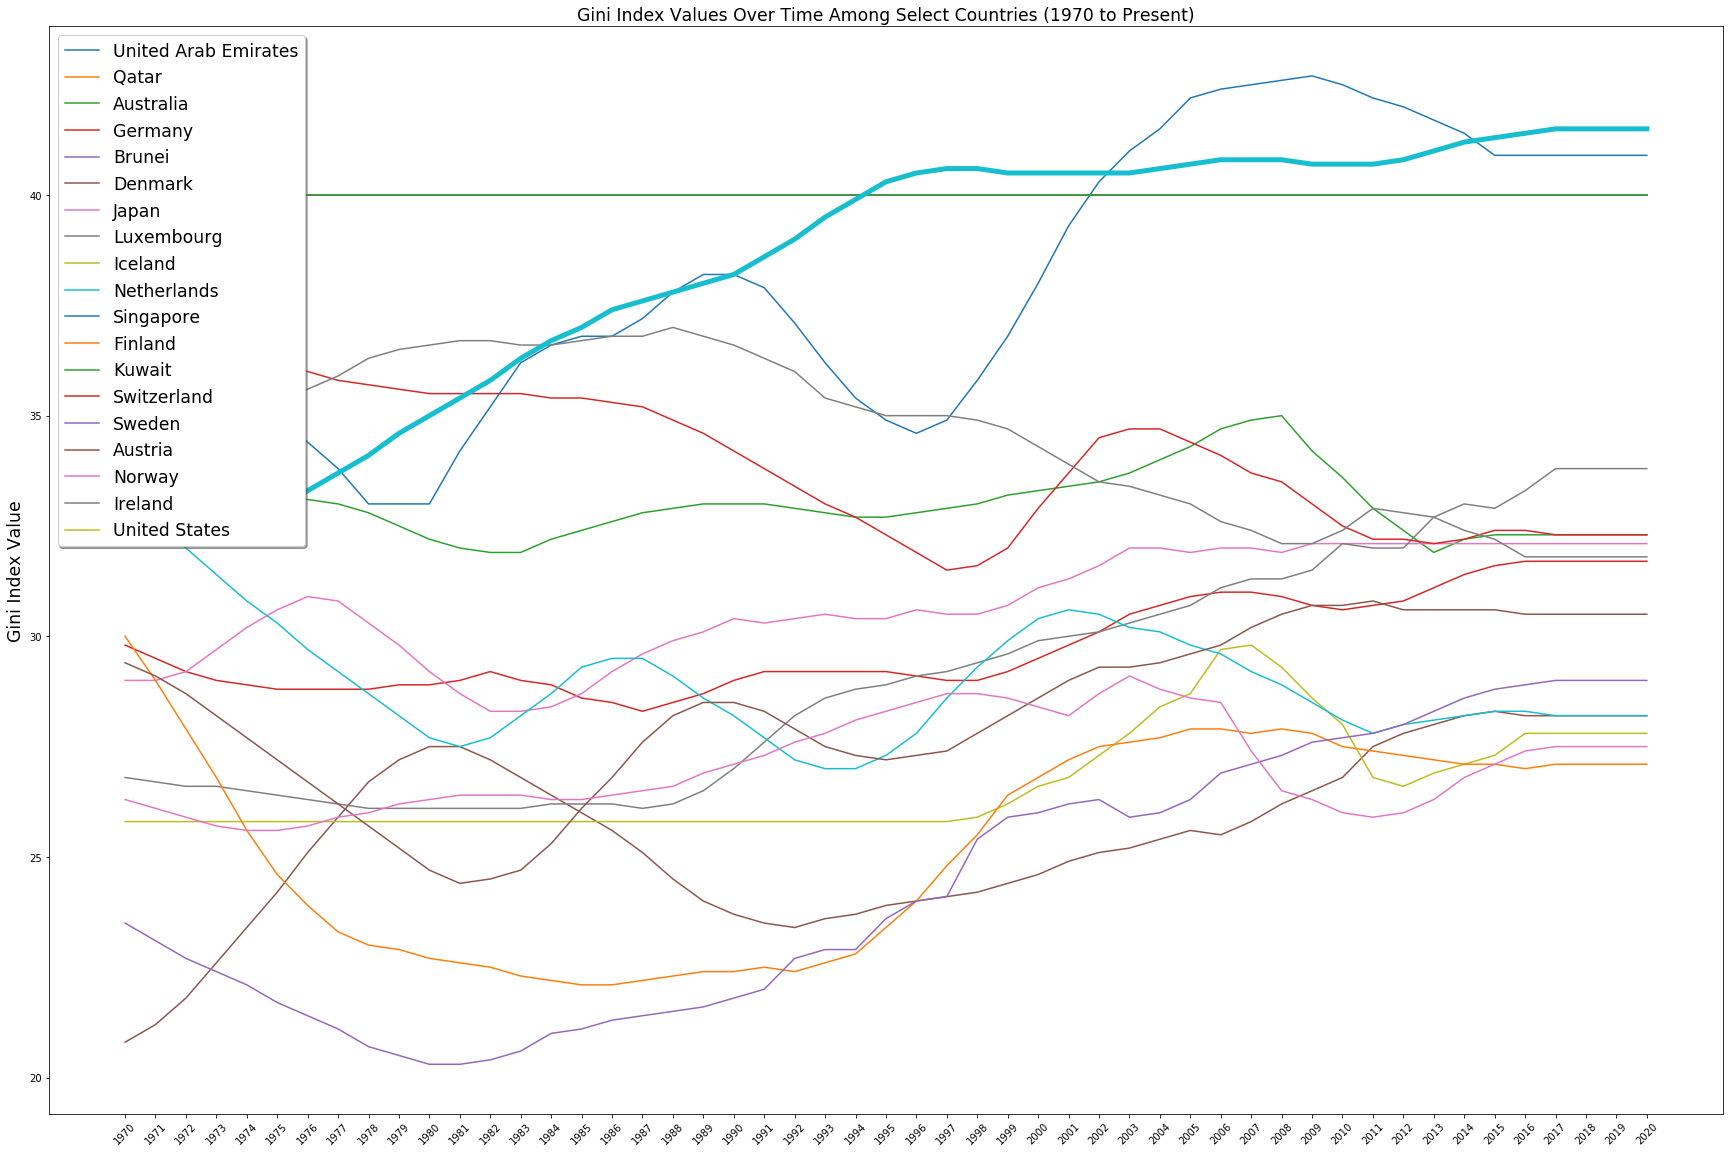

In [353]:
fig = plt.figure(figsize=(30,20))

plt.plot(gini_simp.T[:]["1970":'2020']);
plt.plot(ginidf.T["United States"]["1970":'2020'], linewidth=5); #US in bold
# plt.plot(ginidf.T["Kuwait"]["1970":'2020'], linewidth=5);



plt.legend()
plt.xticks(rotation=45)
plt.title("Gini Index Values Over Time Among Select Countries (1970 to Present)", fontsize="xx-large")
plt.legend(ledf_simp.T, loc='upper left', shadow=True, fontsize="xx-large")
plt.ylabel("Gini Index Value", fontsize="xx-large")
plt.show();



Above we see all select countries with a high life expectancy trending towards a Gini Index between 26 and 33. While the US has rapidly diverged towards higher Gini Index, showing the rapid increase in wealth inequality in the US. Even Singapore which is also high, is trending back down while the US continues to climb.

No handles with labels found to put in legend.


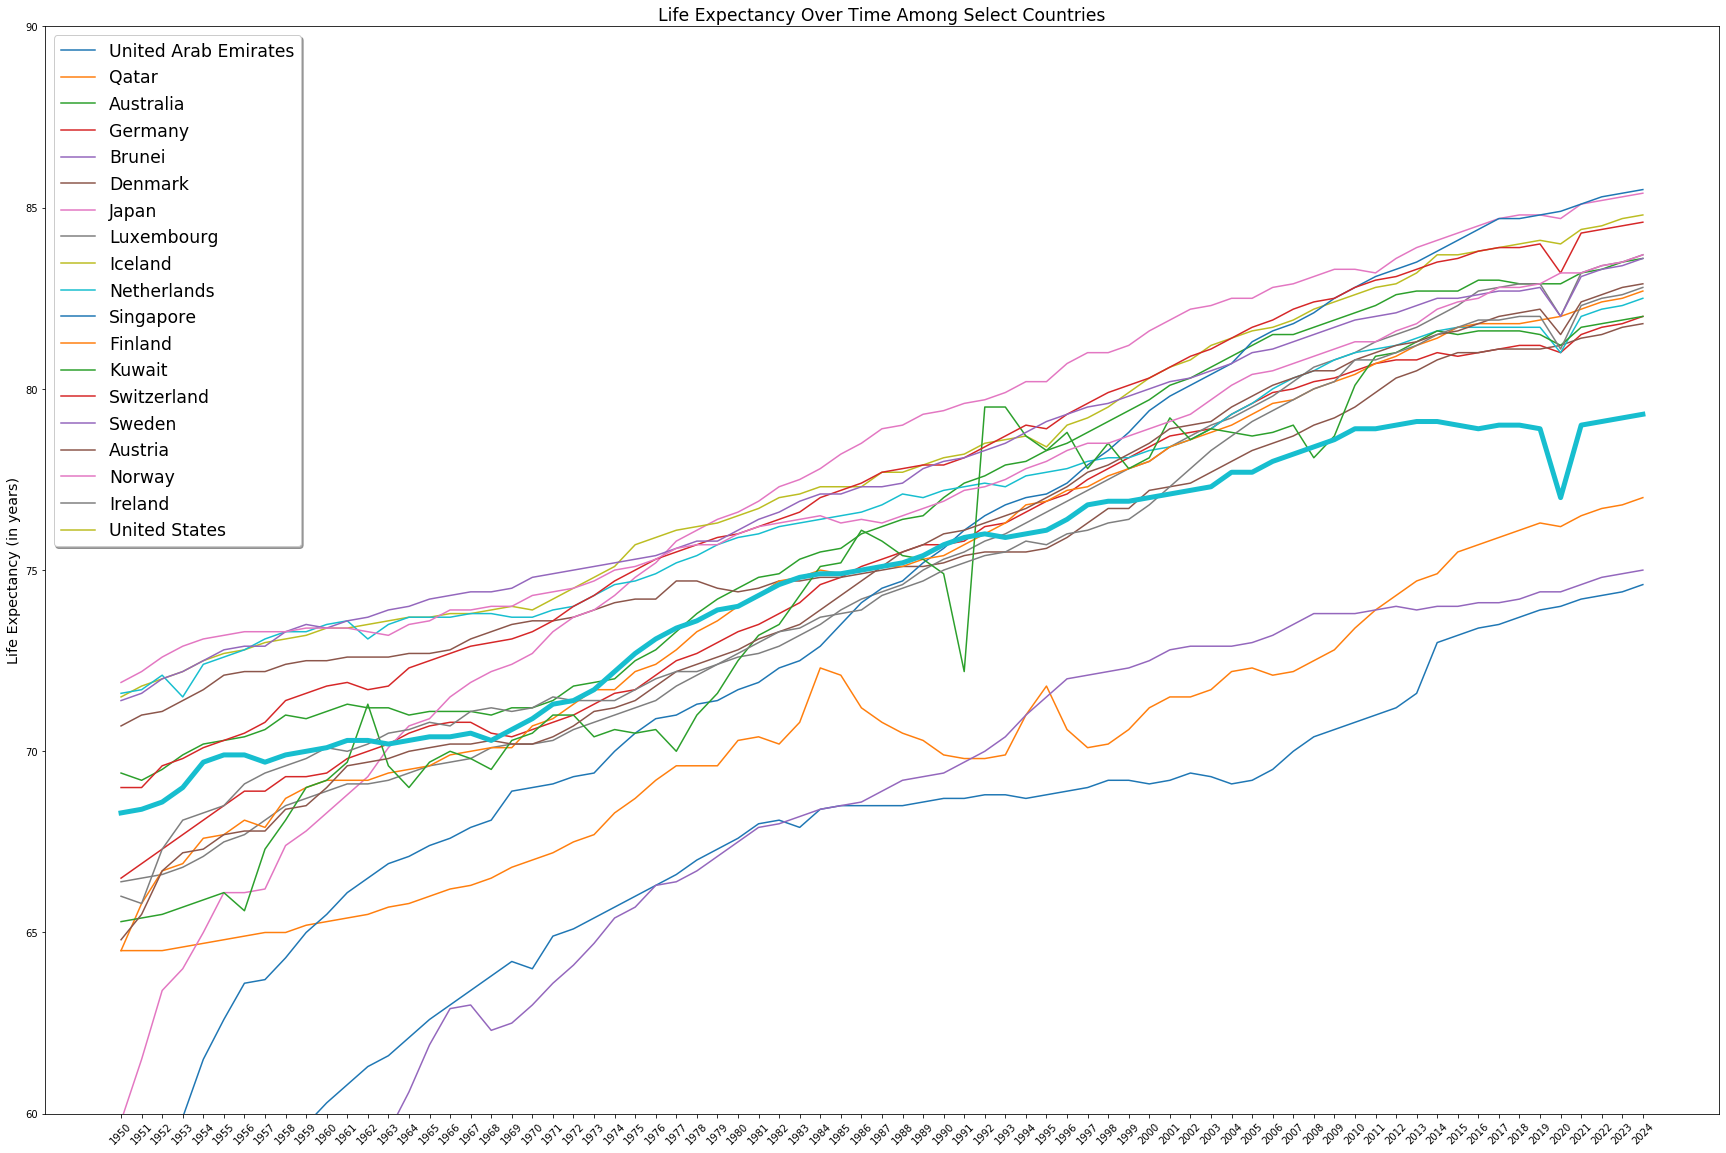

<Figure size 432x288 with 0 Axes>

In [354]:
fig = plt.figure(figsize=(30,20))

plt.plot(ledf_simp.T);
plt.plot(ledf_simp.T["United States"], linewidth=5);

plt.ylim(60,90)

plt.legend()
plt.xticks(rotation=45)
plt.title("Life Expectancy Over Time Among Select Countries", fontsize="xx-large")
plt.legend(ledf_simp.T, loc='upper left', shadow=True, fontsize="xx-large")
plt.ylabel("Life Expectancy (in years)", fontsize="x-large")
plt.show()
plt.savefig("lifeexpectancy.png");



But we have gotten ahead of ourselves, above we can see the life expectancy of our select countries over time, since the 1950s, as early as the late 70s early 80s we start to see the US life expectancy slowly diverging from the cluster of similar countries of which we see converging into the 80s.
We also notice the dip in 2020 from Covid, we notice here that the US has a much deeper dip, even though the US has some of the most advanced medicine and hospitals, these services were not available to many americans it seems. It is important to notice also that many of the values post 2020 are estimates and may not be the accurate values, so we will not be analyzing data beyond 2021.

No handles with labels found to put in legend.


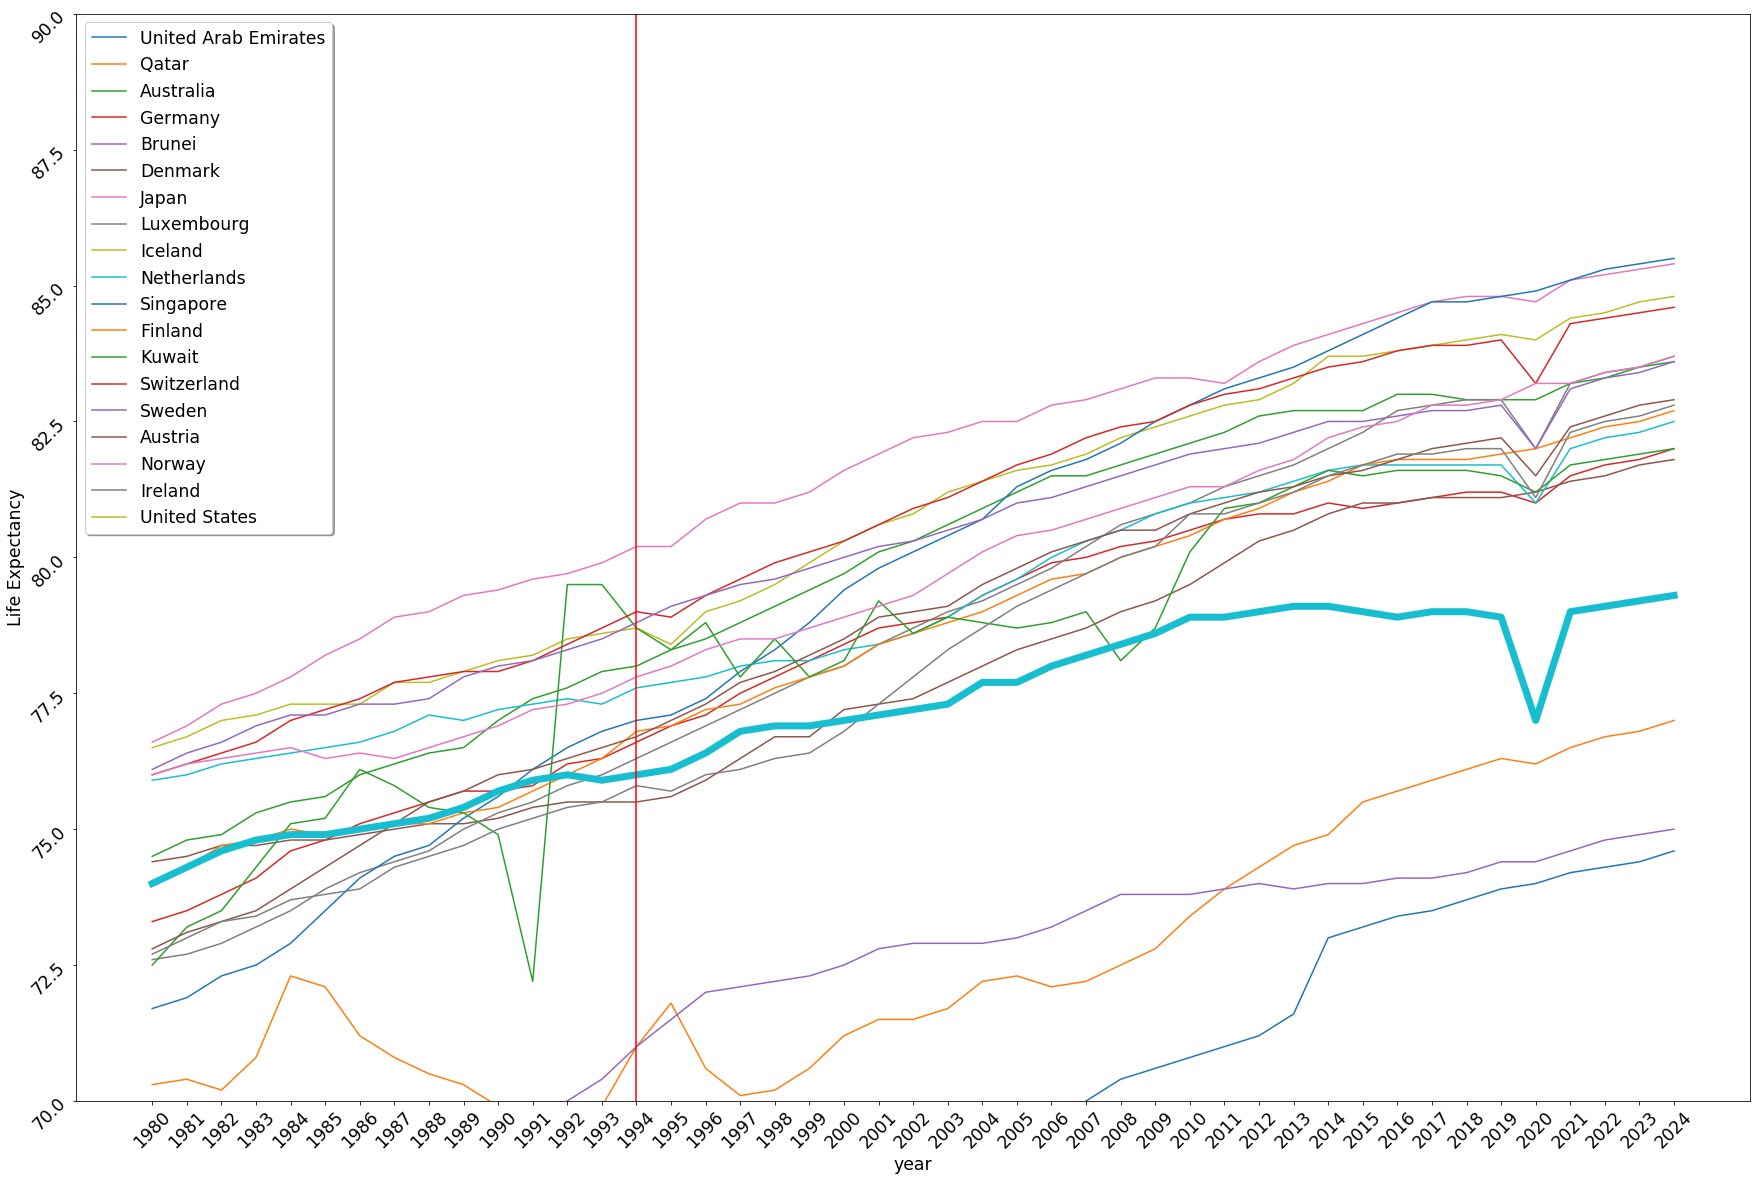

In [356]:
fig = plt.figure(figsize=(30,20))

plt.plot(ledf_simp.T["1980":"2024"]);
plt.plot(ledf_simp.T["United States"]["1980":"2024"], linewidth=7);

plt.ylim(70,90)

plt.legend()
plt.yticks(fontsize="xx-large", rotation=45)

plt.xticks(fontsize="xx-large", rotation=45)
plt.legend(ledf_simp.T, loc='upper left', shadow=True, fontsize="xx-large")
plt.axvline(x="1994", color='red' );
plt.xlabel("year", fontsize="xx-large")
plt.ylabel("Life Expectancy", fontsize="xx-large")

plt.show();



Here we have taken a closer look zooming on the years 1980 to present (again we must not put too much value into data beyond 2021) we can see the US even in the 80s diverging away from the cluster, turning flat and slowing in growth when other countries life expectancy is increasing. We see that the recent headlines of the US life expectancy being in decine, is not a new phenomena but is in fact part of a process that has been occurring for 40 years.

No handles with labels found to put in legend.


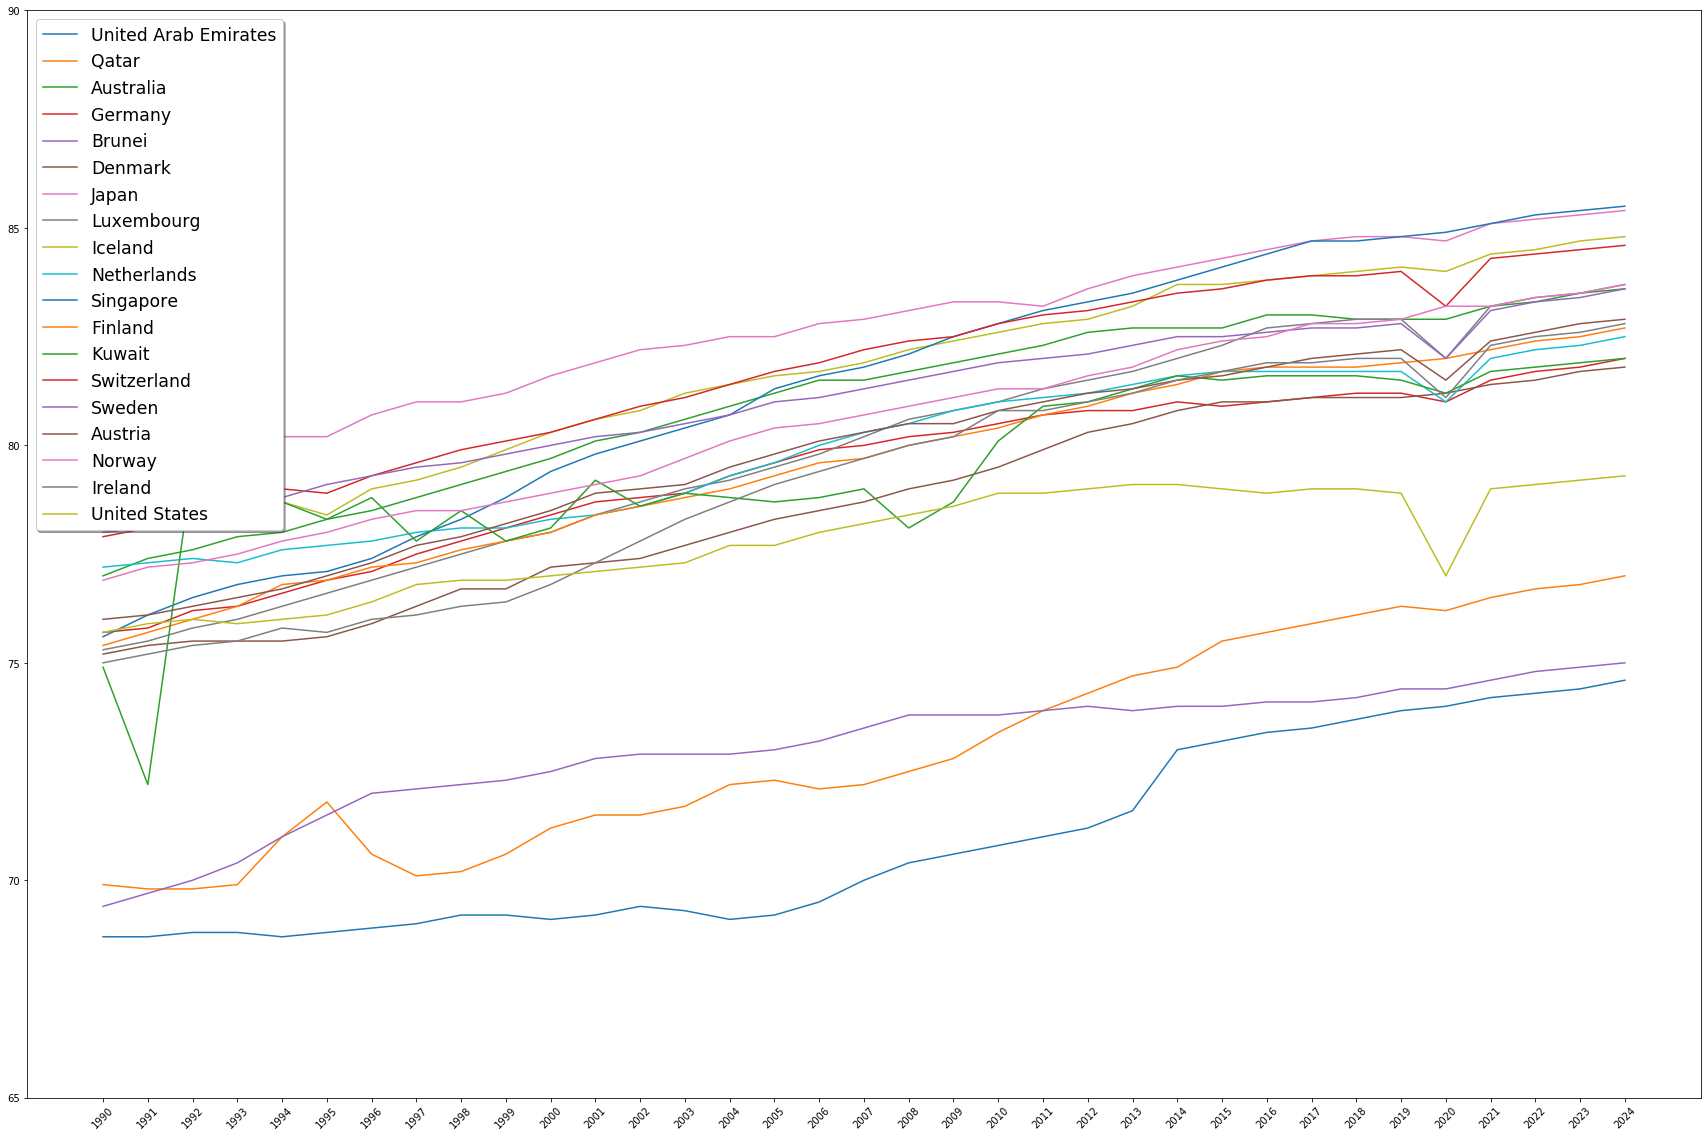

In [357]:
fig = plt.figure(figsize=(30,20))

plt.plot(ledf_simp.T["1990":"2024"]);
plt.ylim(65,90)

plt.legend()
plt.xticks(rotation=45)
plt.legend(ledf_simp.T, loc='upper left', shadow=True, fontsize="xx-large")
plt.show();


In [359]:
ginidf.T["United States"]["1970":"2021"] #lets look at the Gini Index over time for the US below

1970    33.0
1971    32.9
1972    32.7
1973    32.7
1974    32.8
1975    32.9
1976    33.3
1977    33.7
1978    34.1
1979    34.6
1980    35.0
1981    35.4
1982    35.8
1983    36.3
1984    36.7
1985    37.0
1986    37.4
1987    37.6
1988    37.8
1989    38.0
1990    38.2
1991    38.6
1992    39.0
1993    39.5
1994    39.9
1995    40.3
1996    40.5
1997    40.6
1998    40.6
1999    40.5
2000    40.5
2001    40.5
2002    40.5
2003    40.5
2004    40.6
2005    40.7
2006    40.8
2007    40.8
2008    40.8
2009    40.7
2010    40.7
2011    40.7
2012    40.8
2013    41.0
2014    41.2
2015    41.3
2016    41.4
2017    41.5
2018    41.5
2019    41.5
2020    41.5
2021    41.5
Name: United States, dtype: float64

Here we see it was at a much "healthier" level in the early to mid 70s but in the mid to late seventies it began to increase really taking off in the 80s and continuing to grow, meaning the US wealth inequality is getting worse with time, and at a dangerous pace. we specifically see in 1994/1995 that we crossed the dangerous level of 40.

In [361]:
gini_le_good=ginidf.loc[list(good_ledf)]
gini_le_bad=ginidf.loc[list(bad_ledf)]
good_ledf=['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Switzerland',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cyprus',
 'Germany',
 'Denmark',
 'Spain',
 'Finland',
 'France',
 'United Kingdom',
 'Greece',
 'Ireland',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'South Korea',
 'Kuwait',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'New Zealand',
 'Panama',
 'Peru',
 'Portugal',
 'Singapore',
 'Slovenia',
 'Sweden']

No handles with labels found to put in legend.


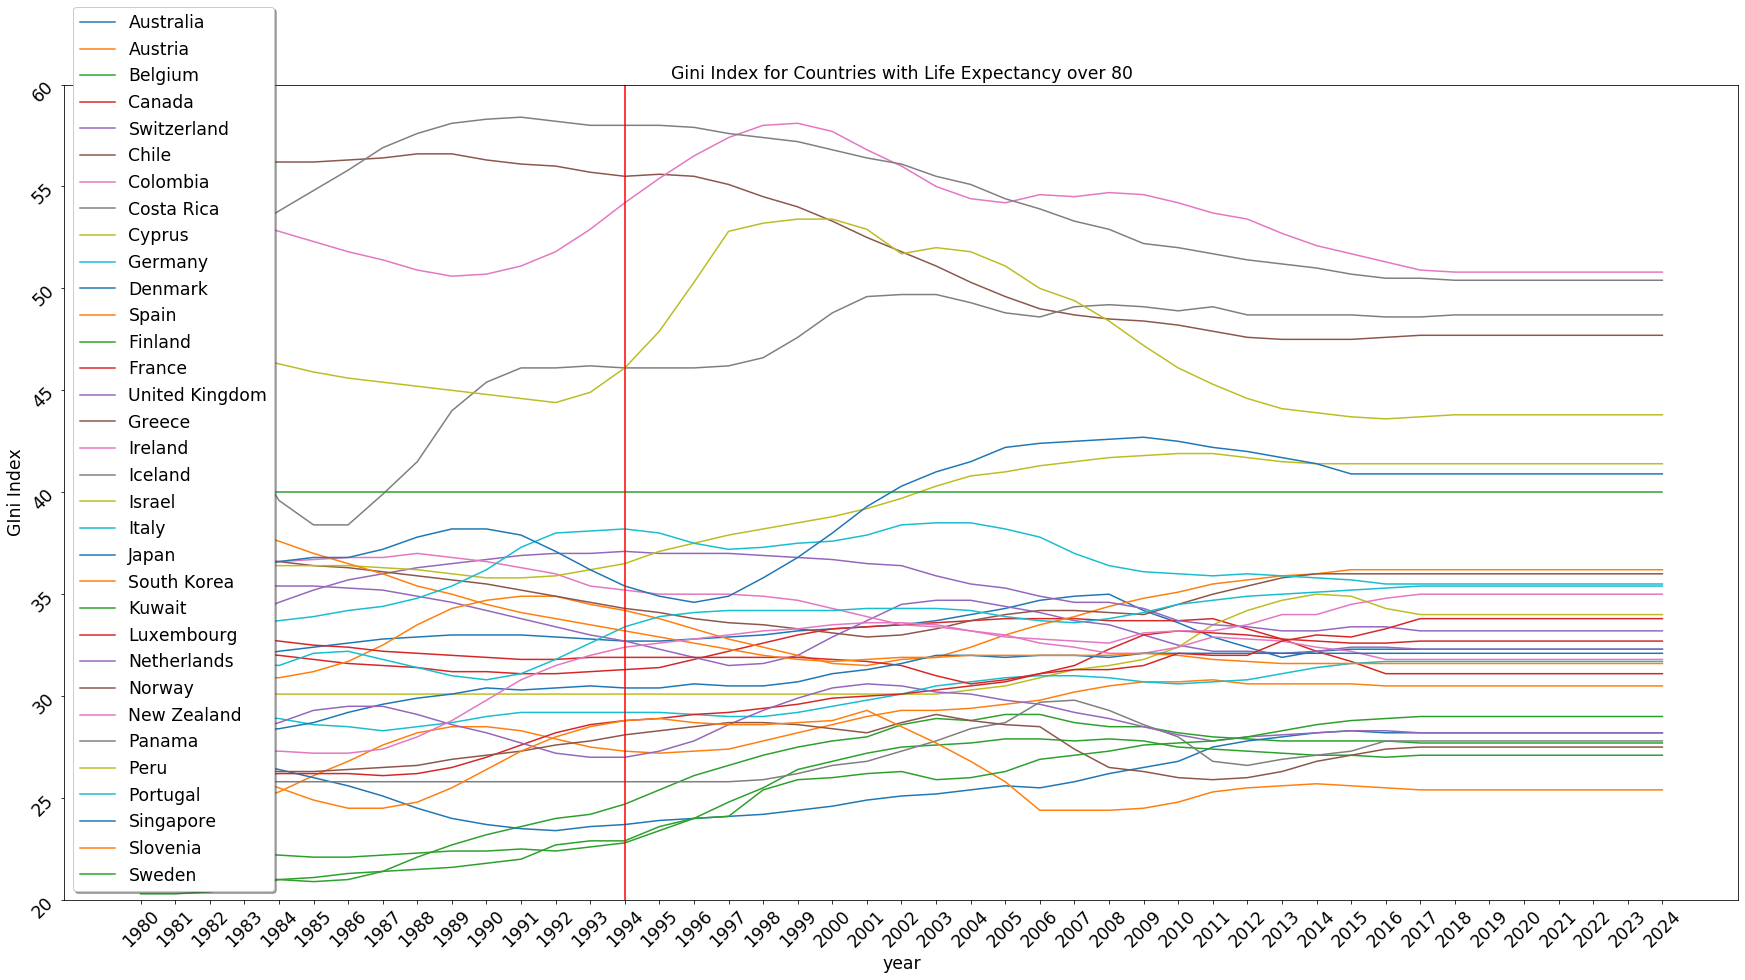

count    33.000000
mean     34.842424
std       6.987848
min      25.400000
25%      30.500000
50%      32.700000
75%      36.200000
max      50.800000
Name: 2020, dtype: float64

In [368]:
#lets take a look at the Gini Index values of all countries with life expectancy over 80
fig = plt.figure(figsize=(30,15))

plt.plot(gini_le_good.T["1980":"2024"]);
# plt.plot(ledf_simp.T["United States"]["1980":"2024"], linewidth=7);

plt.ylim(20,60)

plt.legend()
plt.yticks(fontsize="xx-large", rotation=45)
plt.title("Gini Index for Countries with Life Expectancy over 80", fontsize="xx-large")
plt.xticks(fontsize="xx-large", rotation=45)
plt.legend(gini_le_good.T, loc='best', shadow=True, fontsize="xx-large")
plt.axvline(x="1994", color='red' );
plt.xlabel("year", fontsize="xx-large")
plt.ylabel("GIni Index", fontsize="xx-large")
# p("gini80.png")
plt.show();

gini_le_good["2020"].describe()

Even among countries beyond our select coutries we see a common trend with life expectancy a Gini Index converging into the range between 25 and 36

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

**Don't forget to create your README!**

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!

Based on the data here, we can see that the US has a serious and growing wealth inequality problem that based on data from other countries as well further support that this inequality is negatively impacting the life expectancy of the majority of its citizens. It would be recommended that the US do everything it can to resolve the wealth inequality the simplest way would be wealth redistribution through higher graduated tax rates for the wealthy and large corporations, as well as stricter and well enforced penalties for evading such taxes. The additional taxes collected shouldbe distributed among the citizens by way of services such as Universal basic Income and healthcare.